# HOUSE PRICE PREDICTION

Prediction using Supervised Machine Learning

The real estate industry is a significant sector of the economy, and accurately predicting house prices is crucial for various stakeholders, including homebuyers, sellers, and real estate investors. Machine learning models can play a pivotal role in providing more precise and data-driven predictions of house prices.

## 1.PROBELM STATEMENT

The aim of this project is to develop a machine learning model that predicts house prices based on a set of features related to the properties. Specifically, the goal is to create a model that can accurately estimate the selling price of houses, taking into account factors such as location, size, number of bedrooms and bathrooms, neighborhood characteristics, and other relevant attributes.

## 2.DATA

Data is collected from kaggle

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [42]:
!pip install seaborn

In [43]:
import seaborn as sns

In [44]:
df = pd.read_csv("house-prices - ML Dataset.csv")

In [45]:
df.head()
df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


In [46]:
df.isna().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [47]:
df.duplicated().sum()

0

In [48]:
df.shape

(128, 8)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


# Plotting a scatter plot for finiding outliers

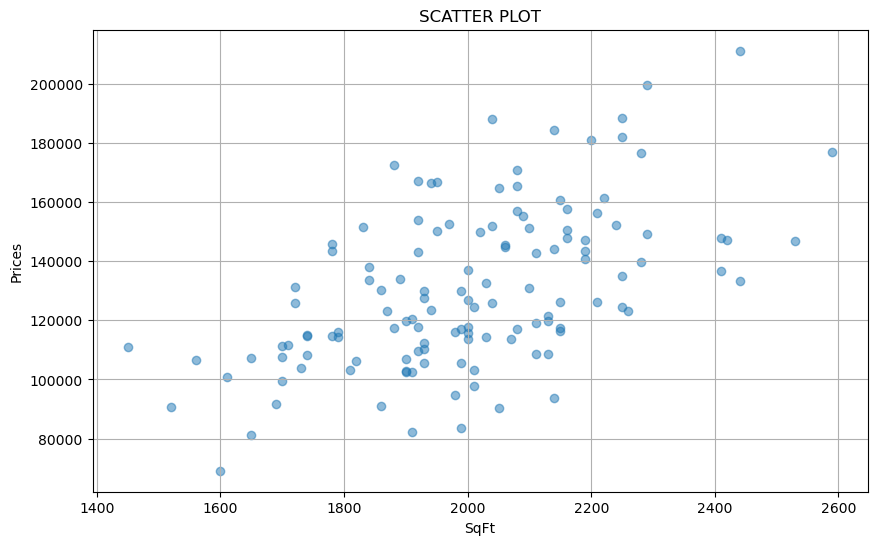

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(df['SqFt'],df['Price'], alpha = 0.5)
plt.grid(True)
plt.title("SCATTER PLOT")
plt.xlabel("SqFt")
plt.ylabel("Prices")
plt.show()

## Finding outliers using IQR and dropping them.

In [51]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
dfo = df[(df['Price']>= lower_bound)& (df['Price']<=upper_bound)]
dfo

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,Yes,East
124,125,147900,2160,4,3,3,Yes,East
125,126,113500,2070,2,2,2,No,North
126,127,149900,2020,3,3,1,No,West


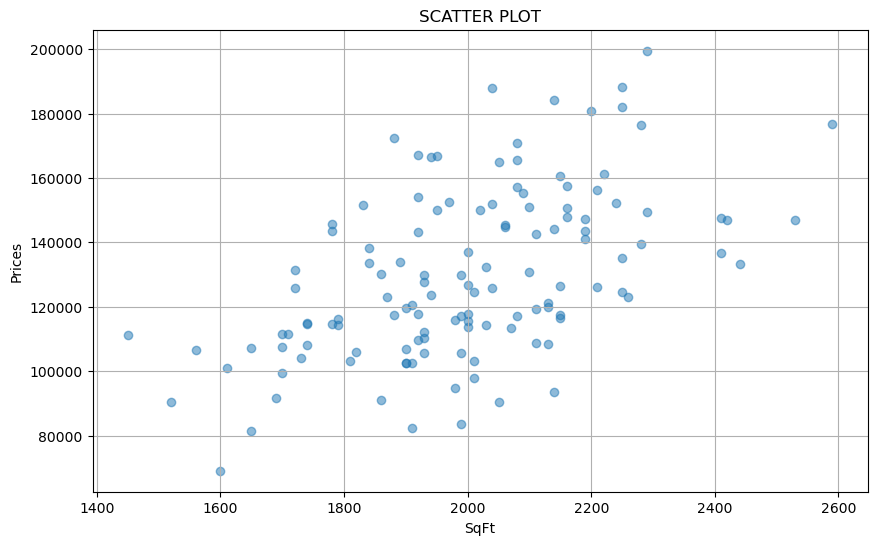

In [52]:
plt.figure(figsize=(10,6))
plt.scatter(dfo['SqFt'],dfo['Price'], alpha = 0.5)
plt.grid(True)
plt.title("SCATTER PLOT")
plt.xlabel("SqFt")
plt.ylabel("Prices")
plt.show()

## Changing Categorical values to numerical values

In [53]:
dfe = pd.get_dummies(dfo,columns=['Brick','Neighborhood'])

In [54]:
dfed=dfe.astype(int)
dfed

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,1,114300,1790,2,2,2,1,0,1,0,0
1,2,114200,2030,4,2,3,1,0,1,0,0
2,3,114800,1740,3,2,1,1,0,1,0,0
3,4,94700,1980,3,2,3,1,0,1,0,0
4,5,119800,2130,3,3,3,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
123,124,119700,1900,3,3,3,0,1,1,0,0
124,125,147900,2160,4,3,3,0,1,1,0,0
125,126,113500,2070,2,2,2,1,0,0,1,0
126,127,149900,2020,3,3,1,1,0,0,0,1


## Applying "SCALING" on numerical values  

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dfed)

scaled_df = pd.DataFrame(scaled_features, columns=dfed.columns)

In [56]:
scaled_df

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,0.000000,0.346626,0.298246,0.000000,0.0,0.2,1.0,0.0,1.0,0.0,0.0
1,0.007874,0.345859,0.508772,0.666667,0.0,0.4,1.0,0.0,1.0,0.0,0.0
2,0.015748,0.350460,0.254386,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.023622,0.196319,0.464912,0.333333,0.0,0.4,1.0,0.0,1.0,0.0,0.0
4,0.031496,0.388804,0.596491,0.333333,0.5,0.4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
122,0.968504,0.388037,0.394737,0.333333,0.5,0.4,0.0,1.0,1.0,0.0,0.0
123,0.976378,0.604294,0.622807,0.666667,0.5,0.4,0.0,1.0,1.0,0.0,0.0
124,0.984252,0.340491,0.543860,0.000000,0.0,0.2,1.0,0.0,0.0,1.0,0.0
125,0.992126,0.619632,0.500000,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,1.0


## Splitting data into training and testing sets 

In [57]:
x = scaled_df.drop('Price',axis = 1)
y = scaled_df['Price']

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [59]:
scaled_df.describe()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,0.497551,0.465424,0.480246,0.338583,0.220472,0.314961,0.677165,0.322835,0.354331,0.346457,0.299213
std,0.291917,0.199309,0.183113,0.241191,0.257071,0.214579,0.469412,0.469412,0.480204,0.477725,0.459727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.248031,0.323236,0.377193,0.333333,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.496063,0.434049,0.482456,0.333333,0.000000,0.400000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.744094,0.603528,0.605263,0.333333,0.500000,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Home                127 non-null    float64
 1   Price               127 non-null    float64
 2   SqFt                127 non-null    float64
 3   Bedrooms            127 non-null    float64
 4   Bathrooms           127 non-null    float64
 5   Offers              127 non-null    float64
 6   Brick_No            127 non-null    float64
 7   Brick_Yes           127 non-null    float64
 8   Neighborhood_East   127 non-null    float64
 9   Neighborhood_North  127 non-null    float64
 10  Neighborhood_West   127 non-null    float64
dtypes: float64(11)
memory usage: 11.0 KB


Text(0.5, 1.0, 'Distribution of house prices')

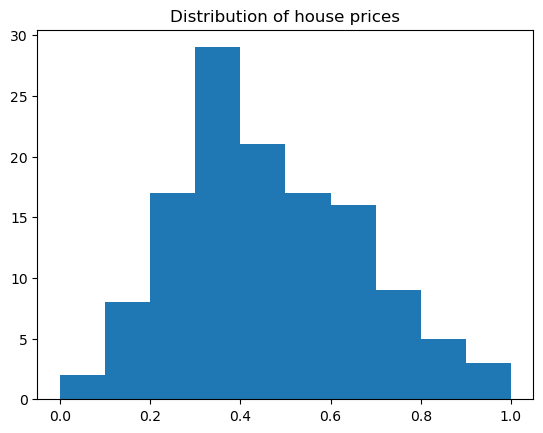

In [77]:
plt.hist(scaled_df['Price'])
plt.title('Distribution of house prices')

Dropping Home column as there is no use with Home field.

In [79]:
scaled_df_ = scaled_df.drop('Home',axis=1)
scaled_df_

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_No,Brick_Yes,Neighborhood_East,Neighborhood_North,Neighborhood_West
0,0.346626,0.298246,0.000000,0.0,0.2,1.0,0.0,1.0,0.0,0.0
1,0.345859,0.508772,0.666667,0.0,0.4,1.0,0.0,1.0,0.0,0.0
2,0.350460,0.254386,0.333333,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.196319,0.464912,0.333333,0.0,0.4,1.0,0.0,1.0,0.0,0.0
4,0.388804,0.596491,0.333333,0.5,0.4,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
122,0.388037,0.394737,0.333333,0.5,0.4,0.0,1.0,1.0,0.0,0.0
123,0.604294,0.622807,0.666667,0.5,0.4,0.0,1.0,1.0,0.0,0.0
124,0.340491,0.543860,0.000000,0.0,0.2,1.0,0.0,0.0,1.0,0.0
125,0.619632,0.500000,0.333333,0.5,0.0,1.0,0.0,0.0,0.0,1.0


# Identifying correlations between features and the target variable

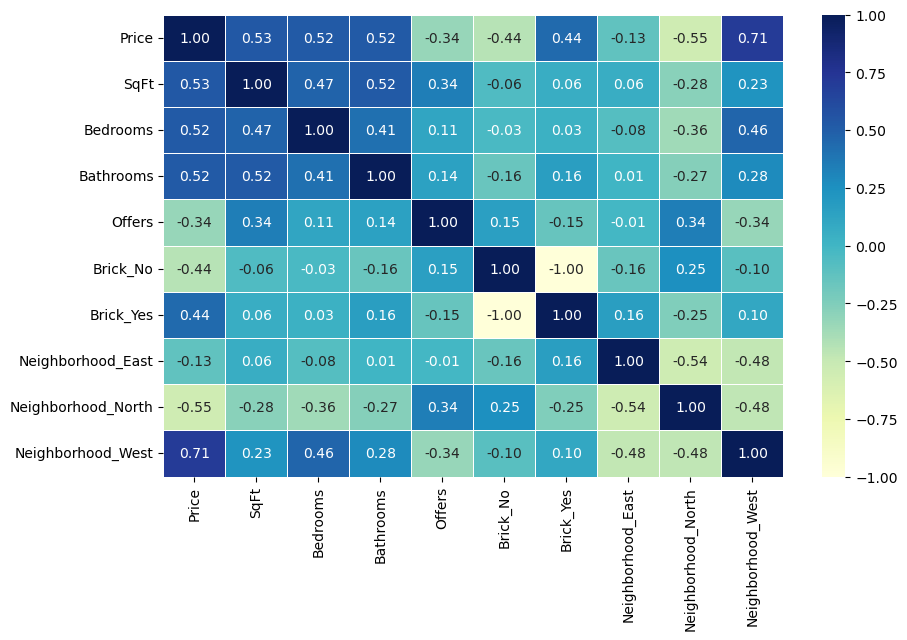

In [80]:
corr_matrix = scaled_df_.corr()
plt.subplots(figsize=(10,6))
ax = sns.heatmap(corr_matrix,annot = True,linewidth=0.5,fmt=".2f",cmap="YlGnBu")

In [81]:
target_correlation = corr_matrix['Price']
target_correlation

Price                 1.000000
SqFt                  0.531726
Bedrooms              0.516275
Bathrooms             0.518797
Offers               -0.335503
Brick_No             -0.438237
Brick_Yes             0.438237
Neighborhood_East    -0.130496
Neighborhood_North   -0.552294
Neighborhood_West     0.710226
Name: Price, dtype: float64

## Importing ML models

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [65]:
models = {"Linear Regression":LinearRegression(),
         "DecisionTreeRegressor":DecisionTreeRegressor(),
         "Random Forest": RandomForestRegressor()}



def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores
    

In [66]:
fit_and_score(models,x_train,x_test,y_train,y_test)

{'Linear Regression': 0.8174006931391103,
 'DecisionTreeRegressor': 0.6151472513561919,
 'Random Forest': 0.7355506823067638}

# EVALUATION METRICS

In [67]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [68]:
def fit_and_score(models,x_train,x_test,y_train,y_test):
    
    np.random.seed(77)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        score =model.score(x_test,y_test)
        y_pred = model.predict(x_test)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print("Mean Absolute Errorr of ", name , ":"  , mae)
        print("R-squared:",name,':', r2)
        print("Root Mean Squared Error:",name,":", rmse)

In [69]:
fit_and_score(models,x_train,x_test,y_train,y_test)

Mean Absolute Errorr of  Linear Regression : 0.06851883258612554
R-squared: Linear Regression : 0.8174006931391103
Root Mean Squared Error: Linear Regression : 0.08536664977561825
Mean Absolute Errorr of  DecisionTreeRegressor : 0.11432279377064652
R-squared: DecisionTreeRegressor : 0.5371415832556464
Root Mean Squared Error: DecisionTreeRegressor : 0.13591355063753352
Mean Absolute Errorr of  Random Forest : 0.08651191599811232
R-squared: Random Forest : 0.7406051514874015
Root Mean Squared Error: Random Forest : 0.10174646958715704


## Considering Random Forest Regressor model

Applying hypertuning on Random Forest Regressor model, even though Linear regression has highest accuracy.Because there are no hyper parameters for Linear regression model, so it can't be tuned.

In [70]:
from sklearn.model_selection import GridSearchCV
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_preds = model.predict(x_test)
np.random.seed(42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
scoring = 'neg_mean_squared_error'
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(x_test)
test_mse = mean_squared_error(y_test,test_predictions)
test_R2 = r2_score(y_test,test_predictions)

In [71]:
test_mse

0.010429350216960682

In [72]:
test_R2

0.7386756370905945

In [73]:
best_model.score(x_test,y_test)

0.7386756370905945

## Visualizing the predictions of the selected model against the actual house prices.

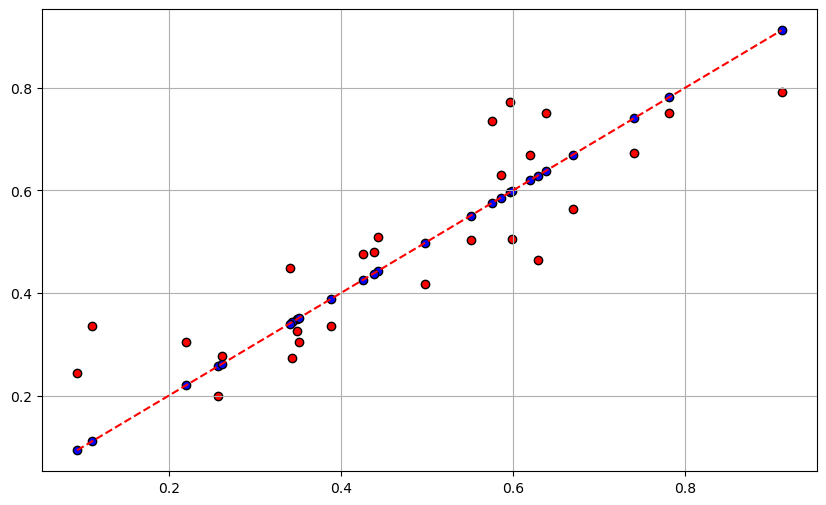

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_test, c='blue', marker='o', edgecolor='k', label='Actual Prices')

plt.scatter(y_test,y_preds,c='red', marker='o', edgecolor='k',label='Predicted Prices')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.show()

## Finding feature importance scores

In [75]:
importances = best_model.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [76]:
feature_importance_df

,Feature,Importance
9,Neighborhood_West,0.546551
1,SqFt,0.225615
4,Offers,0.053680
3,Bathrooms,0.046732
0,Home,0.045082
5,Brick_No,0.030381
6,Brick_Yes,0.027341
2,Bedrooms,0.016619
8,Neighborhood_North,0.005523
7,Neighborhood_East,0.002476


Neighborhood_West has the highest feature importance